# 10-K Risk Section

In [1]:
!pip install sec_edgar_downloader
from sec_edgar_downloader import Downloader
#Create the downloader
dl = Downloader()

#Download 5 years of 10k documents
dl.get("10-K", "0001341439", after="2014-01-01", before="2019-01-01")

     |████████████████████████████████| 6.4 MB 49.3 MB/s            
     |████████████████████████████████| 1.6 MB 108.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=1f6589a8d358cb69d36d311952ba4c27aea6cfb1623a63a978975ca957feb08e
  Stored in directory: /home/jovyan/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:
      Successfully uninstalled typing-extensions-3.7.4.2
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


5

In [2]:
#!pip install osqp
import os
#List the directory
print(os.listdir("sec-edgar-filings/0001341439/10-K"))

['full-submission.txt', '.ipynb_checkpoints', '0001193125-16-628942', '0001193125-14-251351', '0001193125-15-235239', '0001193125-17-214833', '0001193125-18-201034']


In [3]:
#Check out the format
print(os.listdir("sec-edgar-filings/0001341439/10-K/0001193125-14-251351"))

['full-submission.txt', 'filing-details.html']


In [4]:
from bs4 import BeautifulSoup

#Read in text files
docs = []
for path in ["sec-edgar-filings/0001341439/10-K/0001193125-18-201034/full-submission.txt",
             "sec-edgar-filings/0001341439/10-K/0001193125-17-214833/full-submission.txt",
             "sec-edgar-filings/0001341439/10-K/0001193125-16-628942/full-submission.txt",
             "sec-edgar-filings/0001341439/10-K/0001193125-15-235239/full-submission.txt",
             "sec-edgar-filings/0001341439/10-K/0001193125-14-251351/full-submission.txt"]:
    with open(path, 'rb') as f:
        #Convert to html then read in the text piece
        docs.append(BeautifulSoup(f.read()).text)

In [5]:
#Let's see the first document
sample_text = docs[0]
print(sample_text[:10000])

0001193125-18-201034.txt : 20180622
0001193125-18-201034.hdr.sgml : 20180622
20180622160907
ACCESSION NUMBER:		0001193125-18-201034
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		105
CONFORMED PERIOD OF REPORT:	20180531
FILED AS OF DATE:		20180622
DATE AS OF CHANGE:		20180622

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			ORACLE CORP
		CENTRAL INDEX KEY:			0001341439
		STANDARD INDUSTRIAL CLASSIFICATION:	SERVICES-PREPACKAGED SOFTWARE [7372]
		IRS NUMBER:				542185193
		FISCAL YEAR END:			0531

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-35992
		FILM NUMBER:		18914618

	BUSINESS ADDRESS:	
		STREET 1:		500 ORACLE PARKWAY
		STREET 2:		MAIL STOP 5 OP 7
		CITY:			REDWOOD CITY
		STATE:			CA
		ZIP:			94065
		BUSINESS PHONE:		6505067000

	MAIL ADDRESS:	
		STREET 1:		500 ORACLE PARKWAY
		STREET 2:		MAIL STOP 5 OP 7
		CITY:			REDWOOD CITY
		STATE:			CA
		ZIP:			94065

	FORMER COMPANY:	
		FORMER CONFORMED NAME:	Ozark Holding Inc.
		DATE OF NAME CH

In [6]:
import re
#Using regular expressions we can find the places where Item 1A. is referenced, the risk section
#Notice the backlash has to be used for the period to escape it
#There are two places we find it, the table of contents and the header
print(re.findall(re.compile('Item 1A\.'),sample_text))

['Item 1A.', 'Item 1A.']


In [7]:
#A better way is to search and find the elements. This will give location as well as matched string
for match in re.finditer('Item 1A\.', sample_text):
    print(match)

<re.Match object; span=(5757, 5765), match='Item 1A.'>
<re.Match object; span=(67551, 67559), match='Item 1A.'>


In [8]:
#We can grab the span as so
print(match.span())

(67551, 67559)


In [9]:
#We can also generalize the regular expression to all items
matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), sample_text))
print(matches)

[<re.Match object; span=(5757, 5765), match='Item 1A.'>, <re.Match object; span=(5797, 5805), match='Item 1B.'>, <re.Match object; span=(5850, 5857), match='Item 2.'>, <re.Match object; span=(5887, 5894), match='Item 3.'>, <re.Match object; span=(5931, 5938), match='Item 4.'>, <re.Match object; span=(6006, 6013), match='Item 5.'>, <re.Match object; span=(6141, 6148), match='Item 6.'>, <re.Match object; span=(6191, 6198), match='Item 7.'>, <re.Match object; span=(6303, 6311), match='Item 7A.'>, <re.Match object; span=(6389, 6396), match='Item 8.'>, <re.Match object; span=(6459, 6466), match='Item 9.'>, <re.Match object; span=(6570, 6578), match='Item 9A.'>, <re.Match object; span=(6621, 6629), match='Item 9B.'>, <re.Match object; span=(67551, 67559), match='Item 1A.'>, <re.Match object; span=(147926, 147934), match='Item 1B.'>, <re.Match object; span=(149036, 149043), match='Item 3.'>, <re.Match object; span=(149380, 149387), match='Item 4.'>, <re.Match object; span=(154286, 154293), ma

In [10]:
#The first index of the mathces will be the actual string
print(matches[0][0])

Item 1A.


In [11]:
#Let's find all matches for Item 1A.
item_matches = [i for i in range(len(matches)) if matches[i][0] == 'Item 1A.']
print(item_matches)

[0, 13]


In [12]:
#We'll take the latest index as the start of the actual section
start = max(item_matches)
#And the end will be the index after
end = start+1

In [13]:
#Let's also get the end span of the first item and the beginning of the span for the second one to find the text between
start = matches[start].span()[1]
end = matches[end].span()[0]
print(start)
print(end)

67559
147926


In [14]:
#And let's inspect the actual text
print(sample_text[start:end])

    Risk
Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by
factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item
7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities. 
Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS)
and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including
via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [15]:
#Now put it in a function
def pull_risk_section(text):
    matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), text))
    start = max([i for i in range(len(matches)) if matches[i][0] == 'Item 1A.'])
    end = start+1
    start = matches[start].span()[1]
    end = matches[end].span()[0]
    return text[start:end]
print(pull_risk_section(sample_text))

    Risk
Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by
factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item
7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities. 
Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS)
and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including
via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [16]:
#We also want to get rid of any unneeded characters
def pull_risk_section(text):
    text = re.sub('\n', ' ', text)
    text = re.sub('\xa0', ' ', text)
    matches = list(re.finditer(re.compile('Item [0-9][A-Z]*\.'), text))
    start = max([i for i in range(len(matches)) if matches[i][0] == 'Item 1A.'])
    end = start+1
    start = matches[start].span()[1]
    end = matches[end].span()[0]
    text = text[start:end]
    return text
risk_section = pull_risk_section(sample_text)
print(risk_section)

    Risk Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.  Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS) and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [17]:
#Let's also make a function for pulling the 10-Ks between our timeframes
def pull_10K(company_id):
    #Create the downloader
    dl = Downloader()

    #Download 5 years of 10k documents
    dl.get("10-K", company_id, after="2014-01-01", before="2019-01-01")
    
    #Grab the paths
    paths_base = os.listdir("sec-edgar-filings/{}/10-K".format(company_id))
    paths = []
    for year in [18, 17, 16, 15, 14]:
        paths.extend([p for p in paths_base if "-{}-".format(year) in p])
    #Read in text files
    docs = []
    for path in paths:
        path = "sec-edgar-filings/{}/10-K/".format(company_id)+path+"/full-submission.txt"
        with open(path, 'rb') as f:
            #Convert to html then read in the text piece
            docs.append(BeautifulSoup(f.read()).text)
    return docs

In [18]:
#Let's see the functions in action
documents = pull_10K("0001341439")
risk_sections = [pull_risk_section(document) for document in documents]
print(risk_sections[0])

    Risk Factors  We operate in rapidly changing economic and technological environments that present numerous risks, many of which are driven by factors that we cannot control or predict. The following discussion, as well as our Critical Accounting Policies and Estimates discussion in Managements Discussion and Analysis of Financial Condition and Results of Operations (Item 7), highlights some of these risks. The risks described below are not exhaustive and you should carefully consider these risks and uncertainties before investing in our securities.  Our Oracle Cloud strategy, including our Oracle Software as a Service (SaaS), Platform as a Service (PaaS), Infrastructure as a Service (IaaS) and Data as a Service (DaaS) offerings, may adversely affect our revenues and profitability.    We provide our cloud and other offerings to customers worldwide via deployment models that best suit their needs, including via our cloud-based SaaS, PaaS, IaaS and DaaS offerings. As these business

In [20]:
#!pip install nltk
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#Let's grab word counts like we did prior
stemmer = nltk.stem.SnowballStemmer('english')
risk_sections = [stemmer.stem(risk_section) for risk_section in risk_sections]
vectorizer = CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(risk_sections)
counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts.columns = [2018,2017,2016,2015,2014]
print(counts)

     |████████████████████████████████| 1.5 MB 35.4 MB/s            


     |████████████████████████████████| 751 kB 107.3 MB/s            
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
       2018  2017  2016  2015  2014
12        0     1     0     0     0
14        1     0     0     0     0
15        1     0     0     0     0
16        1     0     0     0     0
17        2     0     0     0     0
...     ...   ...   ...   ...   ...
write     4     4     4     4     4
year      5     3     3     3     1
years     4     5     6     7     7
yemen     0     0     0     1     0
yen       1     1     1     1     1

[1831 rows x 5 columns]


In [21]:
#In this case we don't need to turn it into frequency if we want to also penalize for different length risk sections
print(sum((counts[2018]-counts[2017])**2)**.5)

74.92663077971676


In [22]:
#We can apply the difference in a horizontal manner
print(counts.diff(axis=1).dropna(axis=1))

       2017  2016  2015  2014
12      1.0  -1.0   0.0   0.0
14     -1.0   0.0   0.0   0.0
15     -1.0   0.0   0.0   0.0
16     -1.0   0.0   0.0   0.0
17     -2.0   0.0   0.0   0.0
...     ...   ...   ...   ...
write   0.0   0.0   0.0   0.0
year   -2.0   0.0   0.0  -2.0
years   1.0   1.0   1.0   0.0
yemen   0.0   0.0   1.0  -1.0
yen     0.0   0.0   0.0   0.0

[1831 rows x 4 columns]


In [23]:
#And then get the distance
print((counts.diff(axis=1).dropna(axis=1)**2).sum()**.5)

2017    74.926631
2016    26.981475
2015    60.415230
2014    44.283180
dtype: float64


In [24]:
#Create a function for the distance
def find_distance(risk_sections):
    stemmer = nltk.stem.SnowballStemmer('english')
    risk_sections = [stemmer.stem(risk_section) for risk_section in risk_sections]
    vectorizer = CountVectorizer(stop_words='english')
    counts = vectorizer.fit_transform(risk_sections)
    counts = pd.DataFrame(counts.toarray(),columns=vectorizer.get_feature_names()).transpose()
    counts.columns = [2018,2017,2016,2015,2014]
    return (counts.diff(axis=1).dropna(axis=1)**2).sum()**.5
print(find_distance(risk_sections))

2017    74.926631
2016    26.981475
2015    60.415230
2014    44.283180
dtype: float64


# Applications of TF-IDF

In [25]:
import numpy as np
#One thing we can do is take the log of the number of terms
tf_log = np.log(1 + counts)
print(tf_log)

           2018      2017      2016      2015      2014
12     0.000000  0.693147  0.000000  0.000000  0.000000
14     0.693147  0.000000  0.000000  0.000000  0.000000
15     0.693147  0.000000  0.000000  0.000000  0.000000
16     0.693147  0.000000  0.000000  0.000000  0.000000
17     1.098612  0.000000  0.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...
write  1.609438  1.609438  1.609438  1.609438  1.609438
year   1.791759  1.386294  1.386294  1.386294  0.693147
years  1.609438  1.791759  1.945910  2.079442  2.079442
yemen  0.000000  0.000000  0.000000  0.693147  0.000000
yen    0.693147  0.693147  0.693147  0.693147  0.693147

[1831 rows x 5 columns]


In [26]:
#Inverse Document Frequency

#First find the number of documents with each term
n = (counts > 0).sum(axis=1)

#Then divide that by total number of documents and take the log of it
idf = np.log(5 / n)
print(idf)

12       1.609438
14       1.609438
15       1.609438
16       1.609438
17       1.609438
           ...   
write    0.000000
year     0.000000
years    0.000000
yemen    1.609438
yen      0.000000
Length: 1831, dtype: float64


In [27]:
tf_idf = tf_log.multiply(idf, axis=0)
print(tf_idf)

           2018      2017  2016      2015  2014
12     0.000000  1.115577   0.0  0.000000   0.0
14     1.115577  0.000000   0.0  0.000000   0.0
15     1.115577  0.000000   0.0  0.000000   0.0
16     1.115577  0.000000   0.0  0.000000   0.0
17     1.768148  0.000000   0.0  0.000000   0.0
...         ...       ...   ...       ...   ...
write  0.000000  0.000000   0.0  0.000000   0.0
year   0.000000  0.000000   0.0  0.000000   0.0
years  0.000000  0.000000   0.0  0.000000   0.0
yemen  0.000000  0.000000   0.0  1.115577   0.0
yen    0.000000  0.000000   0.0  0.000000   0.0

[1831 rows x 5 columns]


In [28]:
#Now we want to try cosine similarity to compare
#Notice the interesting pattern here of similarity getting smaller and smaller as the years are farther apart
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(tf_idf.transpose())
similarity = pd.DataFrame(similarity, index=[2018,2017,2016,2015,2014],columns=[2018,2017,2016,2015,2014])
print(similarity)

          2018      2017      2016      2015      2014
2018  1.000000  0.217534  0.085013  0.039181  0.016017
2017  0.217534  1.000000  0.314551  0.121534  0.030892
2016  0.085013  0.314551  1.000000  0.349458  0.098140
2015  0.039181  0.121534  0.349458  1.000000  0.139923
2014  0.016017  0.030892  0.098140  0.139923  1.000000


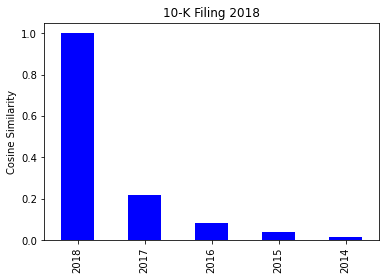

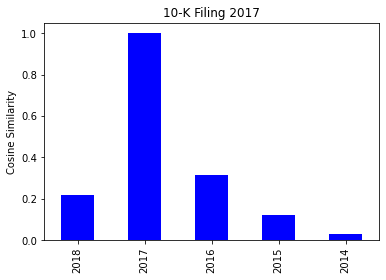

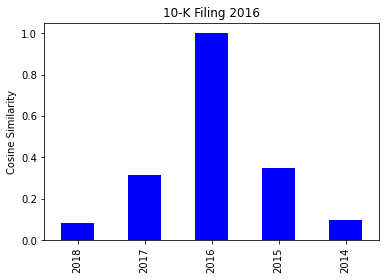

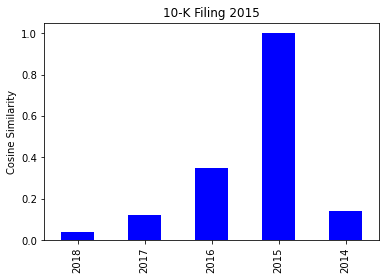

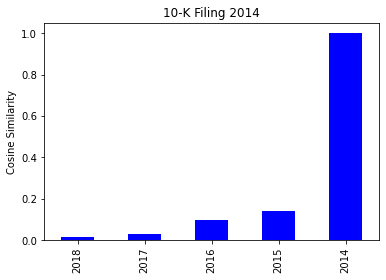

In [29]:
import matplotlib.pyplot as plt

for yr in similarity.index:
    similarity.loc[yr].plot(kind='bar', color='blue')
    plt.title("10-K Filing {}".format(yr))
    plt.ylabel("Cosine Similarity")
    plt.show()

In [30]:
yoy_similarity = pd.Series([similarity.loc[x,x+1] for x in [2017,2016,2015,2014]])
yoy_similarity.index = ['{}-{}'.format(x,x+1) for x in [2017,2016,2015,2014]]
print(yoy_similarity)

2017-2018    0.217534
2016-2017    0.314551
2015-2016    0.349458
2014-2015    0.139923
dtype: float64


In [31]:
#Let's see the most impactful words that either came on in the latest or were much more frequent
#As well as the opposite
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values().head(10))
print()
print()
print(tf_idf.diff(axis=1).dropna(axis=1).iloc[:,0].sort_values(ascending=False).head(10))

index         -4.651874
act           -3.346732
repurchase    -2.883726
warehouse     -2.590290
implemented   -2.231155
autonomous    -2.231155
provisional   -2.231155
guidance      -2.231155
policy        -2.231155
award         -1.768148
Name: 2017, dtype: float64


deployed       1.768148
turkey         1.768148
taxation       1.115577
strengthen     1.115577
generation     1.115577
36             1.115577
legislative    1.115577
57             1.115577
adopting       1.115577
12             1.115577
Name: 2017, dtype: float64


In [32]:
#We see these words were specific only to one filing
print(counts.loc['autonomous'])
print()
print(counts.loc['turkey'])

2018    3
2017    0
2016    0
2015    0
2014    0
Name: autonomous, dtype: int64

2018    0
2017    2
2016    0
2015    0
2014    0
Name: turkey, dtype: int64


In [33]:
print(counts.loc['software'])
print()
print(tf_idf.loc['software'])

2018    17
2017    49
2016    50
2015    51
2014    53
Name: software, dtype: int64

2018    0.0
2017    0.0
2016    0.0
2015    0.0
2014    0.0
Name: software, dtype: float64


In [34]:
print(tf_log.loc['software'])
print()
print(idf.loc['software'])

2018    2.890372
2017    3.912023
2016    3.931826
2015    3.951244
2014    3.988984
Name: software, dtype: float64

0.0


# Risk Analysis

In [35]:
#An application of looking at these things is to see if there are companies that are becoming competitors
#Only in the most recent filing amazon comes up, but Oracle constantly mentions cloud
print(counts.loc["amazon"])
print(counts.loc["cloud"])
print()
print()
#Because cloud is mentioned in every documents it has no importance in the tf_idf
print(tf_idf.loc["amazon"])
print(tf_idf.loc["cloud"])

2018    1
2017    0
2016    0
2015    0
2014    0
Name: amazon, dtype: int64
2018    65
2017    61
2016    52
2015    48
2014    49
Name: cloud, dtype: int64


2018    1.115577
2017    0.000000
2016    0.000000
2015    0.000000
2014    0.000000
Name: amazon, dtype: float64
2018    0.0
2017    0.0
2016    0.0
2015    0.0
2014    0.0
Name: cloud, dtype: float64


In [36]:
#Pull the risk sections of Amazon and Oracle
documents_oracle = pull_10K( "0001341439")
documents_amazon = pull_10K("0001018724")

risk_sections_oracle = [pull_risk_section(document) for document in documents_oracle]
risk_sections_amazon = [pull_risk_section(document) for document in documents_amazon]


In [37]:
#Parse each risk section
stemmer = nltk.stem.SnowballStemmer('english')
vectorizer = CountVectorizer(stop_words='english')
counts_oracle = vectorizer.fit_transform(risk_sections_oracle)
counts_oracle = pd.DataFrame(counts_oracle.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_oracle.columns = [2018,2017,2016,2015,2014]


counts_amazon = vectorizer.fit_transform(risk_sections_amazon)
counts_amazon = pd.DataFrame(counts_amazon.toarray(),columns=vectorizer.get_feature_names()).transpose()
counts_amazon.columns = [2018,2017,2016,2015,2014]


counts_amazon = counts_amazon.stack().reset_index()
counts_oracle = counts_oracle.stack().reset_index()

In [38]:
counts_amazon.columns = ["Word", "Time Period", "Count"]
counts_amazon["Company"] = "Amazon"
counts_oracle.columns = ["Word", "Time Period", "Count"]
counts_oracle["Company"] = "Oracle"
counts = pd.concat([counts_amazon, counts_oracle])
print(counts)

         Word  Time Period  Count Company
0     10table         2018      1  Amazon
1     10table         2017      1  Amazon
2     10table         2016      1  Amazon
3     10table         2015      1  Amazon
4     10table         2014      1  Amazon
...       ...          ...    ...     ...
9150      yen         2018      1  Oracle
9151      yen         2017      1  Oracle
9152      yen         2016      1  Oracle
9153      yen         2015      1  Oracle
9154      yen         2014      1  Oracle

[15805 rows x 4 columns]


In [39]:
#Now that we are combining the two together, something to consider is how idf will be impacted
#Before, it was a huge difference when Oracle had Amazon added to the risk section
#Now, however, the word will look much less important if IDF is done over the full document
print(counts[counts["Word"] == "amazon"])
print()
print()
#Likewise, Oracle as a word will now be more important because it is not featured in Amazon's 10-K
print(counts[counts["Word"] == "oracle"])

       Word  Time Period  Count Company
410  amazon         2018      5  Amazon
411  amazon         2017      5  Amazon
412  amazon         2016      5  Amazon
413  amazon         2015      5  Amazon
414  amazon         2014      2  Amazon
570  amazon         2018      1  Oracle
571  amazon         2017      0  Oracle
572  amazon         2016      0  Oracle
573  amazon         2015      0  Oracle
574  amazon         2014      0  Oracle


        Word  Time Period  Count Company
5795  oracle         2018     28  Oracle
5796  oracle         2017     29  Oracle
5797  oracle         2016     29  Oracle
5798  oracle         2015     28  Oracle
5799  oracle         2014     19  Oracle


In [40]:
counts = counts.set_index(["Company", "Time Period", "Word"])["Count"].unstack().transpose().fillna(0)
print(counts)

Company     Amazon                     Oracle                    
Time Period   2014 2015 2016 2017 2018   2014 2015 2016 2017 2018
Word                                                             
10table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
11table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
12             0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  1.0  0.0
12table        1.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
13table        0.0  1.0  1.0  1.0  1.0    0.0  0.0  0.0  0.0  0.0
...            ...  ...  ...  ...  ...    ...  ...  ...  ...  ...
years          0.0  1.0  1.0  1.0  2.0    7.0  7.0  6.0  5.0  4.0
yemen          0.0  0.0  0.0  0.0  0.0    0.0  1.0  0.0  0.0  0.0
yen            1.0  1.0  1.0  1.0  1.0    1.0  1.0  1.0  1.0  1.0
yuan           1.0  1.0  1.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0
zone           2.0  2.0  2.0  2.0  2.0    0.0  0.0  0.0  0.0  0.0

[2330 rows x 10 columns]


In [41]:
tf_log = np.log(counts + 1)

n = (counts > 0).sum(axis=1)

idf = np.log(len(counts.columns) / n)
tf_idf = tf_log.multiply(idf, axis=0)
print(tf_idf)

Company        Amazon                                            Oracle  \
Time Period      2014      2015      2016      2017      2018      2014   
Word                                                                      
10table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
11table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
12           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12table      0.480453  0.480453  0.480453  0.480453  0.480453  0.000000   
13table      0.000000  0.635124  0.635124  0.635124  0.635124  0.000000   
...               ...       ...       ...       ...       ...       ...   
years        0.000000  0.073030  0.073030  0.073030  0.115750  0.219091   
yemen        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
yen          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
yuan         0.834530  0.834530  0.834530  0.000000  0.000000  0.000000   
zone         0.761500  0.

In [42]:
#Let's find cosine similarity
similarity = cosine_similarity(tf_idf.transpose())
similarity = pd.DataFrame(similarity, index=tf_idf.columns,columns=tf_idf.columns)
print(similarity)

Company                Amazon                                          \
Time Period              2014      2015      2016      2017      2018   
Company Time Period                                                     
Amazon  2014         1.000000  0.892893  0.870036  0.831557  0.638701   
        2015         0.892893  1.000000  0.953613  0.917318  0.663976   
        2016         0.870036  0.953613  1.000000  0.929743  0.668093   
        2017         0.831557  0.917318  0.929743  1.000000  0.696616   
        2018         0.638701  0.663976  0.668093  0.696616  1.000000   
Oracle  2014         0.010387  0.012309  0.013100  0.015255  0.029081   
        2015         0.007431  0.004044  0.004684  0.006780  0.022268   
        2016         0.008414  0.005209  0.005860  0.008016  0.023630   
        2017         0.007940  0.006101  0.007953  0.009825  0.038226   
        2018         0.019691  0.021148  0.019548  0.021329  0.075023   

Company                Oracle                     

In [43]:
#And for each time period find the similarity between the two
yearly_sim = pd.Series([similarity.loc[("Amazon",x),("Oracle", x)] for x in [2018,2017,2016,2015,2014]], index=[2018,2017,2016,2015,2014])
print(yearly_sim)

2018    0.075023
2017    0.009825
2016    0.005860
2015    0.004044
2014    0.010387
dtype: float64


In [44]:
#We can see that amazon talks a lot more about the supply chain buzzwords
diff = tf_idf[("Amazon", 2018)] - tf_idf[("Oracle", 2018)]
print(diff.sort_values(ascending=False).head(10))
print()
print()
print(diff.sort_values().head(10))

Word
nopas          3.705868
appeal         3.192061
announced      2.529648
2017           2.253599
notice         2.231155
contentswe     2.231155
fulfillment    2.110302
content        1.963834
sellers        1.877077
commerce       1.662094
dtype: float64


Word
index         -6.655327
repurchase    -4.125679
2018          -3.346732
policy        -3.192061
autonomous    -3.192061
cloud         -2.904047
byol          -2.529648
stockholder   -2.529648
learning      -2.529648
social        -2.529648
dtype: float64


In [45]:
#We see that two new words that amazon began using stores, and omnichannel became a big difference
#One limitation is that words are split
#So if amazon mentions whole foods it would be split losing the actual importance of it being a company
#rather than two distinct words
i = diff.sort_values(ascending=False).head(5).index
print(counts.loc[i])

Company     Amazon                      Oracle                    
Time Period   2014 2015 2016 2017  2018   2014 2015 2016 2017 2018
Word                                                              
nopas          0.0  0.0  0.0  0.0   4.0    0.0  0.0  0.0  0.0  0.0
appeal         0.0  0.0  0.0  0.0   3.0    0.0  0.0  0.0  0.0  0.0
announced      0.0  0.0  0.0  0.0   2.0    0.0  0.0  0.0  0.0  0.0
2017           0.0  0.0  0.0  0.0  12.0    0.0  0.0  0.0  3.0  1.0
notice         0.0  0.0  0.0  2.0   3.0    0.0  0.0  0.0  0.0  0.0


In [46]:
#This analysis can be useful to assess country level threats
#And correlations in the currency markets
print(counts.loc[['yemen', 'turkey', 'china']])

Company     Amazon                     Oracle                    
Time Period   2014 2015 2016 2017 2018   2014 2015 2016 2017 2018
Word                                                             
yemen          0.0  0.0  0.0  0.0  0.0    0.0  1.0  0.0  0.0  0.0
turkey         0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  2.0  0.0
china          1.0  2.0  3.0  3.0  3.0    2.0  2.0  2.0  2.0  2.0


# Sentiment Analysis

In [ ]:
#The word list has multiple sheets with tone descriptions for different words
#Something to note is that a word can be in multiple lists!
import pandas as pd
word_list = pd.read_excel("Data/LM Word List.xlsx", sheet_name="Negative",header=None)
print(word_list)

In [ ]:
#Create a matrix of word types and the words that match these types
word_list = []
for sentiment_class in ["Negative", "Positive", "Uncertainty", "Litigious",
                       "StrongModal", "WeakModal", "Constraining"]:
    sentiment_list = pd.read_excel("Data/LM Word List.xlsx", sheet_name=sentiment_class,header=None)
    sentiment_list.columns = ["Word"]
    sentiment_list["Word"] = sentiment_list["Word"].str.lower()
    sentiment_list[sentiment_class] = 1
    sentiment_list = sentiment_list.set_index("Word")[sentiment_class]
    word_list.append(sentiment_list)
word_list = pd.concat(word_list, axis=1, sort=True).fillna(0)
print(word_list)

In [ ]:
#Examples of words which have multiple groups
print(word_list.loc[word_list.sum(axis=1) > 1])

In [ ]:
#Let's reindex by negative words, as well as drop na, and see what negative words are mentioned
#We will look at percent frequency
tf_percent = counts / counts.sum()
negative_words = word_list[word_list["Negative"] == 1].index
negative_frequency = tf_percent.reindex(negative_words).dropna()
print(negative_frequency)

In [ ]:
#There seems to be slightly higher negative term frequency for amazon, especially in the last few years
print("Year by Company negative word frequency")
print(negative_frequency.sum())
print()
print("Average company negative frequency")
print(negative_frequency.sum().groupby("Company").mean())

In [ ]:
#Let's see what were the most common negative words in Amazon's latest risk section
negative_frequency.sort_values(by=("Amazon", 2018), ascending=False)

In [ ]:
#And for all word types.....
l = []
for word_type in word_list.columns:
    word_type_list = word_list[word_list[word_type] == 1].index
    word_type_frequency = tf_percent.reindex(word_type_list).dropna().sum()
    l.append(word_type_frequency)
word_type_frequency = pd.concat(l, axis=1)
word_type_frequency.columns = word_list.columns
print(word_type_frequency)